# Solution to `StageA` (Quiz) at Hamoye

In [2]:
# Import the necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#url to access the dataset
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'

#reading the .csv dataset directly into pandas dataframe
data = pd.read_csv(url)

### Question 1

In [4]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

A.extend(B)

In [5]:
print (A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


### Question 2

In [6]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Question 3

In [8]:
#View the head of the data
data.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [9]:
#Group the data by fuel_type_code_pudl
data.groupby(by='fuel_type_code_pudl')

In [10]:
# Get the minimum value
data['fuel_cost_per_unit_burned'].min()

-276.08

In [11]:
# Obtain the index of the minimum value
data[data['fuel_cost_per_unit_burned']==-276.08].index.values

array([7733], dtype=int64)

In [12]:
# Get the values of the index
data.iloc[7733]

record_id                       f1_fuel_2000_12_194_3_3
utility_id_ferc1                                    194
report_year                                        2000
plant_name_ferc1                    nelson dewey unit 2
fuel_type_code_pudl                               waste
fuel_unit                                           ton
fuel_qty_burned                                      39
fuel_mmbtu_per_unit                              0.0155
fuel_cost_per_unit_burned                       -276.08
fuel_cost_per_unit_delivered                    -174.67
fuel_cost_per_mmbtu                              -8.906
Name: 7733, dtype: object

### Question 4

In [13]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


### Question 5

In [14]:
data['fuel_qty_burned'].skew()

15.851495469109503

In [15]:
data['fuel_qty_burned'].kurt()

651.3694501337732

### Question 6

In [16]:
data.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [17]:
# Chwck the percentage of missing values
(data['fuel_unit'].isna().sum()/len(data['fuel_unit']))*100

0.609694136774718

### Question 7

This feature should be `categorical and mode imputation`

In [18]:
# Check the categories in the column
data['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

### Question 8

Ans: `Fuel_mmbtu_per_unit and fuel_cost_per_unit_delivered`

In [19]:
data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


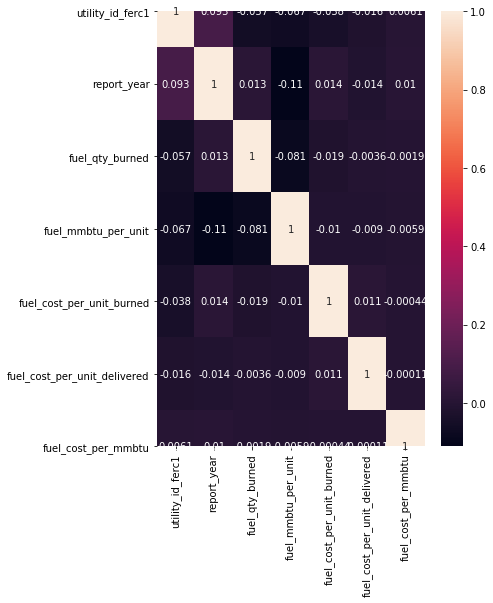

In [20]:
plt.figure(figsize=(6, 8))
sns.heatmap(data.corr(),annot=True)

### Question 10


In [21]:
sorted_data = data.sort_values(by='fuel_cost_per_unit_delivered', ascending=False)
sorted_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
3564,f1_fuel_1997_12_9_0_8,9,1997,peach bt 2&3,nuclear,gramsU,210474.0,0.000065,37.847,7964521.0,0.578
3244,f1_fuel_1996_12_9_0_8,9,1996,peach bt 2&3,nuclear,gramsU,211407.0,0.000065,36.865,7793482.0,0.145
3565,f1_fuel_1997_12_9_0_11,9,1997,salem 1&2,nuclear,gramsU,36919.0,0.000056,61.100,2255688.0,1.087
3245,f1_fuel_1996_12_9_0_14,9,1996,hope creek 1,nuclear,gramsU,58795.0,0.000065,35.964,2114508.0,0.095
3566,f1_fuel_1997_12_9_0_14,9,1997,hope creek 1,nuclear,gramsU,52526.0,0.000066,39.660,1942979.0,0.560
